In [1]:
cd ~/code/ctl/build/python

/Users/rhl/code/ctl/build/python


In [2]:
%matplotlib notebook
import ctl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull
def sphere_sample(N, dim=4):
    norm = np.random.normal
    normal_deviates = norm(size=(dim, N))
    radius = np.sqrt((normal_deviates**2).sum(axis=0))
    return (normal_deviates/radius).T
#h(a, b, c, d) = (a^2 + b^2 − c^2 − d^2, 2(ad + bc), 2(bd − ac)).
h = lambda l : [np.square(l[0]) + np.square(l[1]) - np.square(l[2]) - np.square(l[3]), 
                2*(l[0]*l[3] + l[1]*l[2]), 
                2*(l[1]*l[3]-l[0]*l[2])]

/usr/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
D = sphere_sample(250)
K = ctl.Simplicial_complex([ctl.Abstract_simplex(s.tolist()) for s in ConvexHull(D).simplices])
print ctl.homology(K)

f = np.array(h(D.T))
f = f.T
print f.shape

print np.median(f[:,0]), np.median(f[:,1]), np.median(f[:,2])
medians = np.median(f,axis=0)

m0 =  medians[0]
m1 =  medians[1]
m2 =  medians[2]
print m0, m1, m2
print f[0,0], f[1,0], f[2,0], f[3,0], 
def cover_f( c):
    north = 1*(f[c,0] > 0)
    if( north):
        return 1*(f[c,1] < m1)
    return 2 + 1*(f[c,2] < m2)
triangles_c = np.array([cover_f(i) for i  in range(len(f[:,0]))]).T
(n,cov_f) = ctl.open_star_vtx_cover(K, cover_f)
print ""
print n.dimension()
print n

[1L, 0L, 0L, 1L]
(250, 3)
-0.0178487320733 0.0500441069831 0.0151189592535
-0.0178487320733 0.0500441069831 0.0151189592535
0.898669211512 0.839157344467 -0.606749779076 0.293914214978 
3
12: [0, 3]
11: [0, 1, 2]
10: [0, 1]
7: [1, 2, 3]
9: [0, 2]
8: [0]
13: [0, 2, 3]
6: [1, 2]
4: [1]
15: [0, 1, 2, 3]
3: [2, 3]
1: [3]
5: [1, 3]
14: [0, 1, 3]
2: [2]



<IPython.core.display.Javascript object>


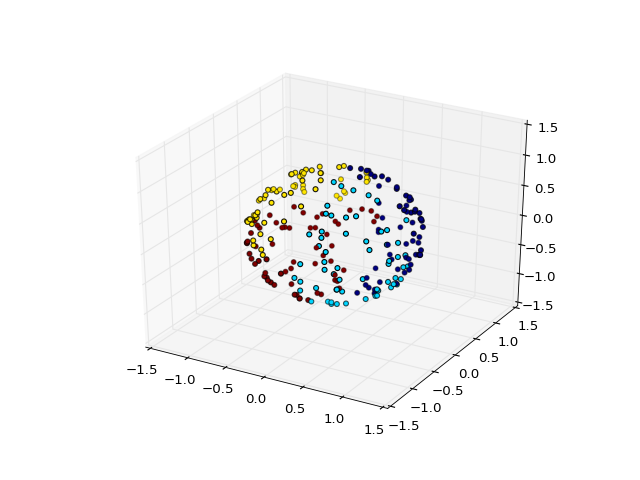

9

In [4]:
fig = plt.figure()
fig.hold(True)
ax = fig.add_subplot(111, projection='3d')
z = ax.scatter(f[:,0], f[:,1], f[:,2],c = triangles_c)
z.set_array(triangles_c)

def forceUpdate(event): z.changed()
fig.canvas.mpl_connect('draw_event', forceUpdate)

In [5]:
blowup = ctl.make_blowup(K,cov_f)

In [6]:
print K.size(), blowup.size()

6732 26938


In [7]:
len([ (list(p.first_cell()), list(p.second_cell())) for (p,d) in blowup if p.second_cell().dimension() == 2])

2065

In [6]:
print ctl.mv_demo(blowup)

ValueError: vector